In [1]:
!wget "https://drive.google.com/uc?export=download&id=1TgyPu18KhbuaQnq37Rvzr0H9TKI0nlfo" -O strange_timestamp.csv
!wget "https://drive.google.com/uc?export=download&id=1TVI38ZwXr4QCJtrD6jQ5MclaAsyZenXe" -O passenger.csv
!wget "https://drive.google.com/uc?export=download&id=1VR8zaNSBdjTOui899zZDu5H2c58UyKba" -O transactions.csv
!wget "https://drive.google.com/uc?export=download&id=1jJIKPHmQQp_nAv9RZw8zUlSDHWavFGKr" -O transactions_drop.csv

--2024-10-23 04:47:49--  https://drive.google.com/uc?export=download&id=1TgyPu18KhbuaQnq37Rvzr0H9TKI0nlfo
Resolving drive.google.com (drive.google.com)... 142.250.196.110, 2404:6800:4004:80c::200e
Connecting to drive.google.com (drive.google.com)|142.250.196.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TgyPu18KhbuaQnq37Rvzr0H9TKI0nlfo&export=download [following]
--2024-10-23 04:47:50--  https://drive.usercontent.google.com/download?id=1TgyPu18KhbuaQnq37Rvzr0H9TKI0nlfo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.222.1, 2404:6800:4004:820::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.222.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67 [application/octet-stream]
Saving to: ‘strange_timestamp.csv’

strange_timestamp.c 100%[===================>]      67  --.-KB/s    in 0s     

In [2]:
import polars as pl

In [3]:
df = pl.read_csv('passenger.csv')
df

timestamp,passenger
str,i64
"""2021-04-01 00:00:00""",394
"""2021-04-01 03:00:00""",362
"""2021-04-01 06:00:00""",401
"""2021-04-01 09:00:00""",445
"""2021-04-01 12:00:00""",357
…,…
"""2023-06-30 09:00:00""",851
"""2023-06-30 12:00:00""",777
"""2023-06-30 15:00:00""",813


In [4]:
df = df.with_columns(
    pl.col('timestamp').str.to_datetime('%Y-%m-%d %H:%M:%S')
)
df

timestamp,passenger
datetime[μs],i64
2021-04-01 00:00:00,394
2021-04-01 03:00:00,362
2021-04-01 06:00:00,401
2021-04-01 09:00:00,445
2021-04-01 12:00:00,357
…,…
2023-06-30 09:00:00,851
2023-06-30 12:00:00,777
2023-06-30 15:00:00,813


In [5]:
df = df.with_columns(
    pl.col('timestamp').dt.year().alias('year'),
    pl.col('timestamp').dt.month().alias('month')
)
df

timestamp,passenger,year,month
datetime[μs],i64,i32,i8
2021-04-01 00:00:00,394,2021,4
2021-04-01 03:00:00,362,2021,4
2021-04-01 06:00:00,401,2021,4
2021-04-01 09:00:00,445,2021,4
2021-04-01 12:00:00,357,2021,4
…,…,…,…
2023-06-30 09:00:00,851,2023,6
2023-06-30 12:00:00,777,2023,6
2023-06-30 15:00:00,813,2023,6


In [6]:
df = pl.read_csv('passenger.csv', try_parse_dates=True)
df

timestamp,passenger
datetime[μs],i64
2021-04-01 00:00:00,394
2021-04-01 03:00:00,362
2021-04-01 06:00:00,401
2021-04-01 09:00:00,445
2021-04-01 12:00:00,357
…,…
2023-06-30 09:00:00,851
2023-06-30 12:00:00,777
2023-06-30 15:00:00,813


In [7]:
pl.Config.set_tbl_rows(100)

polars.config.Config

In [8]:
df = pl.read_csv('transactions.csv')

In [9]:
df = df.sort('customer_id', 'year_month').with_columns(
    pl.col('amount').shift(1).over('customer_id')
    .alias('previous_month_amount')
).sort('customer_id').head(50)
df

year_month,customer_id,amount,previous_month_amount
str,i64,i64,i64
"""2023-01""",1,960,null
"""2023-02""",1,5490,960
"""2023-03""",1,5326,5490
"""2023-04""",1,5291,5326
"""2023-05""",1,3872,5291
"""2023-06""",1,3192,3872
"""2023-07""",1,5834,3192
"""2023-08""",1,6365,5834
"""2023-09""",1,566,6365


In [10]:
df = pl.read_csv('passenger.csv')
df

timestamp,passenger
str,i64
"""2021-04-01 00:00:00""",394
"""2021-04-01 03:00:00""",362
"""2021-04-01 06:00:00""",401
"""2021-04-01 09:00:00""",445
"""2021-04-01 12:00:00""",357
"""2021-04-01 15:00:00""",357
"""2021-04-01 18:00:00""",448
"""2021-04-01 21:00:00""",407
"""2021-04-02 00:00:00""",322


In [11]:
df.with_columns(
    pl.col('passenger').shift(8).diff(8).alias('passeneger_diff')
).head(24)

timestamp,passenger,passeneger_diff
str,i64,i64
"""2021-04-01 00:00:00""",394,null
"""2021-04-01 03:00:00""",362,null
"""2021-04-01 06:00:00""",401,null
"""2021-04-01 09:00:00""",445,null
"""2021-04-01 12:00:00""",357,null
"""2021-04-01 15:00:00""",357,null
"""2021-04-01 18:00:00""",448,null
"""2021-04-01 21:00:00""",407,null
"""2021-04-02 00:00:00""",322,null


In [12]:
df.with_columns(
    (pl.col('passenger').shift(8) - pl.col('passenger').shift(16)).alias('passenger_diff')
).head(24)

timestamp,passenger,passenger_diff
str,i64,i64
"""2021-04-01 00:00:00""",394,null
"""2021-04-01 03:00:00""",362,null
"""2021-04-01 06:00:00""",401,null
"""2021-04-01 09:00:00""",445,null
"""2021-04-01 12:00:00""",357,null
"""2021-04-01 15:00:00""",357,null
"""2021-04-01 18:00:00""",448,null
"""2021-04-01 21:00:00""",407,null
"""2021-04-02 00:00:00""",322,null


In [13]:
df.with_columns(
    pl.col('passenger').diff(8).alias('passeneger_diff')
).head(24)

timestamp,passenger,passeneger_diff
str,i64,i64
"""2021-04-01 00:00:00""",394,null
"""2021-04-01 03:00:00""",362,null
"""2021-04-01 06:00:00""",401,null
"""2021-04-01 09:00:00""",445,null
"""2021-04-01 12:00:00""",357,null
"""2021-04-01 15:00:00""",357,null
"""2021-04-01 18:00:00""",448,null
"""2021-04-01 21:00:00""",407,null
"""2021-04-02 00:00:00""",322,-72


In [14]:
df.with_columns(
    (pl.col('passenger').shift(8).diff(8) / pl.col('passenger').shift(16))
    .alias('passenger_diff_ratio')
)

timestamp,passenger,passenger_diff_ratio
str,i64,f64
"""2021-04-01 00:00:00""",394,null
"""2021-04-01 03:00:00""",362,null
"""2021-04-01 06:00:00""",401,null
"""2021-04-01 09:00:00""",445,null
"""2021-04-01 12:00:00""",357,null
"""2021-04-01 15:00:00""",357,null
"""2021-04-01 18:00:00""",448,null
"""2021-04-01 21:00:00""",407,null
"""2021-04-02 00:00:00""",322,null


In [15]:
!pip install japanize_matplotlib
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [17]:
df = pl.read_csv('passenger.csv')
df

timestamp,passenger
str,i64
"""2021-04-01 00:00:00""",394
"""2021-04-01 03:00:00""",362
"""2021-04-01 06:00:00""",401
"""2021-04-01 09:00:00""",445
"""2021-04-01 12:00:00""",357
"""2021-04-01 15:00:00""",357
"""2021-04-01 18:00:00""",448
"""2021-04-01 21:00:00""",407
"""2021-04-02 00:00:00""",322


In [18]:
df = df.with_columns(pl.col('timestamp').str.to_datetime('%Y-%m-%d %H:%M:%S'))
df

timestamp,passenger
datetime[μs],i64
2021-04-01 00:00:00,394
2021-04-01 03:00:00,362
2021-04-01 06:00:00,401
2021-04-01 09:00:00,445
2021-04-01 12:00:00,357
2021-04-01 15:00:00,357
2021-04-01 18:00:00,448
2021-04-01 21:00:00,407
2021-04-02 00:00:00,322


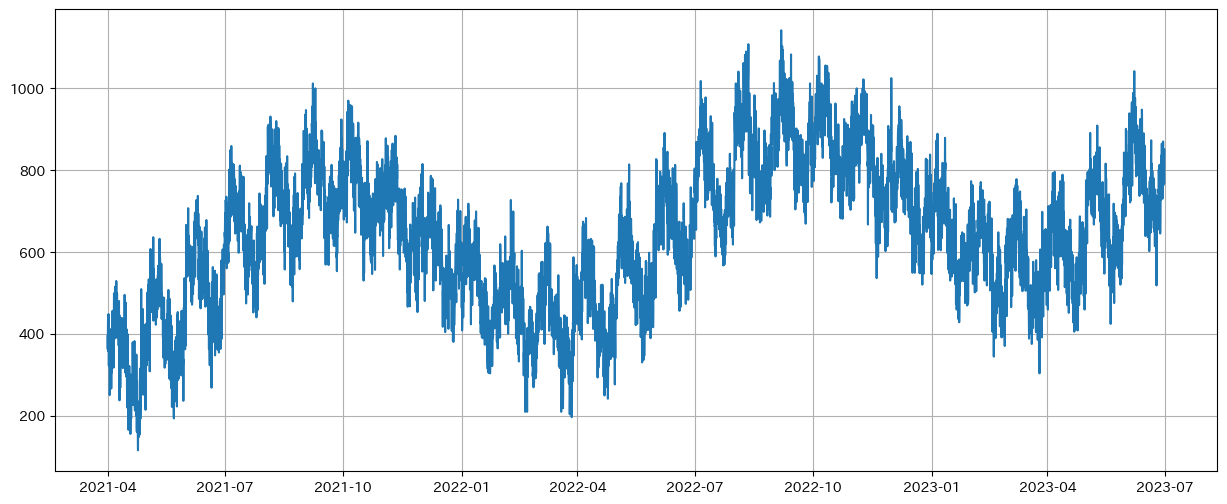

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(df.get_column('timestamp'), df.get_column('passenger'))
plt.grid(True)

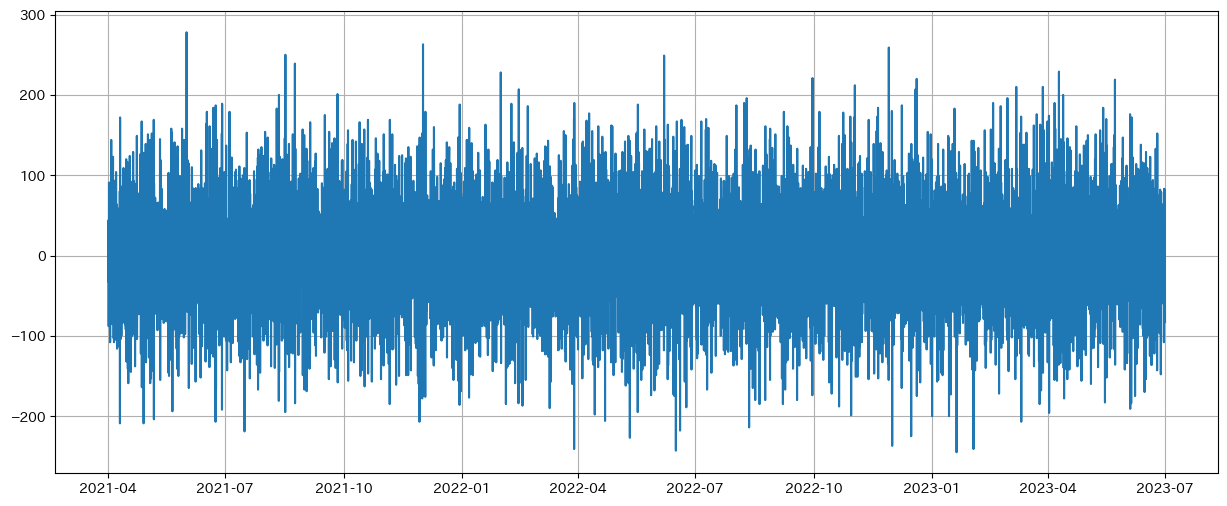

In [20]:
df = pl.read_csv('passenger.csv')
df = df.with_columns(pl.col('timestamp').str.to_datetime('%Y-%m-%d %H:%M:%S'))
df = df.with_columns(pl.col('passenger').diff().alias('passenger_diff'))
plt.figure(figsize=(15, 6))
plt.plot(df.get_column('timestamp'), df.get_column('passenger_diff'))
plt.grid(True)

In [21]:
df = pl.read_csv('passenger.csv')
df = df.with_columns(pl.col('timestamp').str.to_datetime('%Y-%m-%d %H:%M:%S')).sort('timestamp')
df

timestamp,passenger
datetime[μs],i64
2021-04-01 00:00:00,394
2021-04-01 03:00:00,362
2021-04-01 06:00:00,401
2021-04-01 09:00:00,445
2021-04-01 12:00:00,357
2021-04-01 15:00:00,357
2021-04-01 18:00:00,448
2021-04-01 21:00:00,407
2021-04-02 00:00:00,322


In [22]:
df = df.with_columns(
    pl.col('passenger')
    .rolling_mean_by(
        'timestamp',
        window_size='6h',
        closed='both'
    ).alias('passenger_moving_average')
)
df

timestamp,passenger,passenger_moving_average
datetime[μs],i64,f64
2021-04-01 00:00:00,394,394.0
2021-04-01 03:00:00,362,378.0
2021-04-01 06:00:00,401,385.666667
2021-04-01 09:00:00,445,402.666667
2021-04-01 12:00:00,357,401.0
2021-04-01 15:00:00,357,386.333333
2021-04-01 18:00:00,448,387.333333
2021-04-01 21:00:00,407,404.0
2021-04-02 00:00:00,322,392.333333


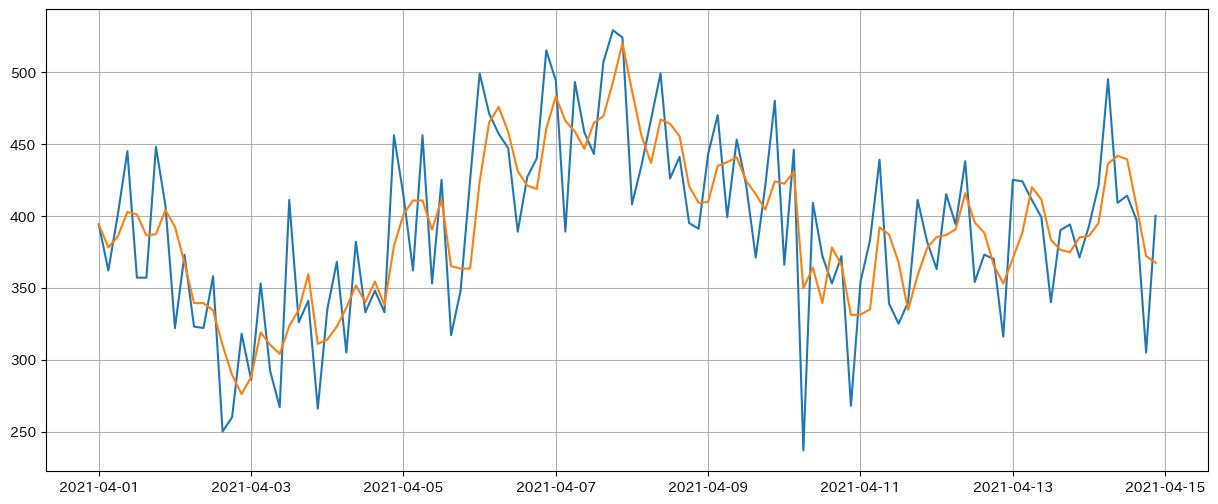

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(
    df.get_column('timestamp').slice(0, 112), 
    df.get_column('passenger').slice(0, 112),        
)
plt.plot(
    df.get_column('timestamp').slice(0, 112), 
    df.get_column('passenger_moving_average').slice(0, 112),        
)
plt.grid()

In [24]:
df = df.with_columns(
    pl.col('passenger')
    .rolling_mean(window_size=3).alias('passenger_moving_average')
)
df

timestamp,passenger,passenger_moving_average
datetime[μs],i64,f64
2021-04-01 00:00:00,394,null
2021-04-01 03:00:00,362,null
2021-04-01 06:00:00,401,385.666667
2021-04-01 09:00:00,445,402.666667
2021-04-01 12:00:00,357,401.0
2021-04-01 15:00:00,357,386.333333
2021-04-01 18:00:00,448,387.333333
2021-04-01 21:00:00,407,404.0
2021-04-02 00:00:00,322,392.333333


In [25]:
df = pl.read_csv('passenger.csv')
df = df.with_columns(pl.col('timestamp').str.to_datetime('%Y-%m-%d %H:%M:%S')).sort('timestamp')

passenger_stats_df = (
    df
    .group_by_dynamic(
        index_column='timestamp',
        every='1mo',
        period='1mo',
    ).agg(
        pl.col('passenger').mean().alias('mean_passenger'),
        pl.col('passenger').std().alias('std_passenger'),
        pl.col('passenger').min().alias('min_passenger'),
        pl.col('passenger').max().alias('max_passenger'),
    )
)

In [26]:
passenger_stats_df

timestamp,mean_passenger,std_passenger,min_passenger,max_passenger
datetime[μs],f64,f64,i64,i64
2021-04-01 00:00:00,331.6875,88.421905,115,529
2021-05-01 00:00:00,414.375,89.926919,193,636
2021-06-01 00:00:00,527.975,92.795403,268,737
2021-07-01 00:00:00,644.012097,87.702316,440,859
2021-08-01 00:00:00,728.112903,94.786631,479,931
2021-09-01 00:00:00,766.925,91.012819,553,1012
2021-10-01 00:00:00,746.741935,90.029988,530,970
2021-11-01 00:00:00,683.920833,91.438836,453,884
2021-12-01 00:00:00,595.391129,89.937249,380,815
